In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [2]:
def plot_save(imarray,fname):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(imarray.shape[1],imarray.shape[0])
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    # ax.imshow(im_np, aspect='normal')
    ax.imshow(imarray, cmap="Greys_r")
    fig.savefig(fname,dpi=1)

In [3]:
def draw_contour(image_base,mask):
    labels = np.unique(mask)[1:]

    #create RGB pallet
    pallete = sns.color_palette(None,len(labels))
    pallete = list(map(lambda x: (int(x[0]*255),int(x[1]*255),int(x[2]*255)),pallete))


    for i,label in enumerate(labels):
        image_bin = ((mask==label)*255).astype(np.uint8)
        contours, _ = cv2.findContours(image_bin, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(image_base,contours, -1, pallete[i], 2)
    return image_base

In [4]:
def add_mask_contour(mask,image_base=None):
    if image_base is None:
        image_base = np.zeros(mask.shape[:2]+(3,))

    
    #Add RGB Channels
    if image_base.shape[-1]!=3:
        image_base = np.expand_dims(image_base,axis=-1)
        image_base = np.concatenate([image_base,image_base,image_base],axis=-1)

    #Simple Convert 8bits
    if not image_base.dtype is np.uint8:
        image_base = minmax_scale(image_base.reshape(-1,1),(0,255)).reshape(image_base.shape).astype(np.uint8)
    
    if len(image_base.shape) ==4:
        for i in range(image_base.shape[0]):
            image_base[i] = draw_contour(image_base[i],mask[i])
    else:
        image_base = draw_contour(image_base,mask)    

    return image_base

In [5]:
def savefig_3d_to_2d(image,filename):
    
    c = 10
    r = image.shape[0]//c
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(image[cnt])#, cmap='gray')
            axs[i,j].axis('off')
            cnt += 1

    fig.set_size_inches(c*image.shape[1],r*image.shape[2])

    fig.savefig(filename,dpi=1)

In [6]:
# load dataset
def load_images(path_src, path_mask):
    src = np.expand_dims(np.load(path_src)['arr_0'], axis=-1)
    tar = np.expand_dims(np.load(path_mask)['arr_0'].astype(np.float32), axis=-1)
    
    return [src,tar]

In [7]:
# [new/pix2pix, new/unet]
rede = 'unet/'

# ['', '_clahe/', '_blur/']
pre_set = ''

# [best/, last/]
model_train = 'last/'

path_preds = '/data/flavio/anatiel/preds/'+rede+model_train

# dataset path
path_src_train = '/data/flavio/anatiel/datasets/A/512x512/train_lung'+pre_set+'.npz'
path_mask_train = '/data/flavio/anatiel/datasets/B_lesion/512x512/train.npz'
path_src_val = '/data/flavio/anatiel/datasets/A/512x512/val_lung'+pre_set+'.npz'
path_mask_val = '/data/flavio/anatiel/datasets/B_lesion/512x512/val.npz'
path_src_test = '/data/flavio/anatiel/datasets/A/512x512/test_lung'+pre_set+'.npz'
path_mask_test = '/data/flavio/anatiel/datasets/B_lesion/512x512/test.npz'

In [8]:
pred = 'imgs_mask_test'+pre_set+'_none.npy'
dilate = 'imgs_mask_test'+pre_set+'_dilate.npy'

original_preds = np.load(path_preds+pred)
op1 = 'dilate'

# load dataset
[src_images_test, tar_images_test] = load_images(path_src_test, path_mask_test)
print('Loaded test images: ', src_images_test.shape, tar_images_test.shape)

Loaded test images:  (550, 512, 512, 1) (550, 512, 512, 1)


In [9]:
# resize image
# dim = (64, 64)
# resized_src = cv2.resize(src_images_test[111,:,:,0], dim, interpolation = cv2.INTER_AREA)
# resized_tar = cv2.resize(tar_images_test[111,:,:,0], dim, interpolation = cv2.INTER_AREA)

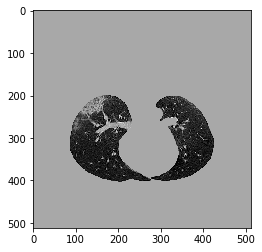

In [10]:
plt.imshow(src_images_test[111,:,:,0], cmap="gray")

In [11]:
out = add_mask_contour(tar_images_test[111,:,:,0], src_images_test[111,:,:,0])
savefig_3d_to_2d(out,"plot.png")

ValueError: Image size of 368640x11016 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 368640x11016 with 510 Axes>